1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from numpy import random
from scipy import integrate
import pandas as pd
import scipy
import seaborn as sns

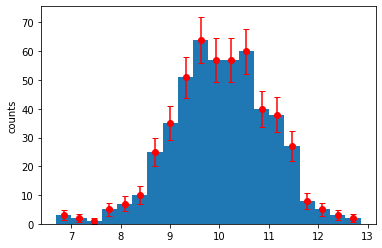

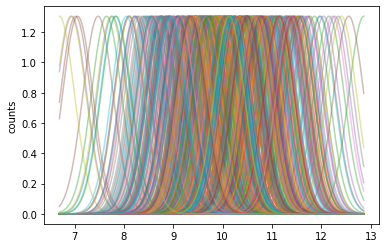

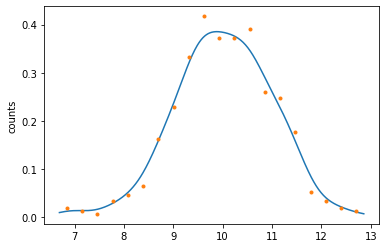

In [2]:
N=500
std=1
mean=10

x=np.random.normal(mean,std,N)

count, bins, _ = plt.hist(x, bins=20)
plt.ylabel('counts')

error=pow(count,0.5)

mean_point=[]
for i in range(0,20):
    media=(bins[i]+bins[i+1])/2
    mean_point.append(media)
    
plt.errorbar(mean_point, count, yerr = error, fmt='ro',capsize=3)

plt.show()

std_def=1.06*std*pow(N,-1/5)
a = np.linspace(x.min(), x.max(), N)

gauss=np.zeros((N,N))

for i in range(0,N):
    rv_i=norm.pdf(a,loc = x[i], scale=std_def)
    plt.plot(a, rv_i,alpha=0.4)
    gauss[i,:]=rv_i
    
plt.ylabel('counts')
        
plt.show()

gauss_sum=np.zeros(N)
for i in range(0,N):
    gauss_sum[i]=np.sum(gauss[:,i])

integr=np.trapz(gauss_sum, dx=(a[1]-a[0]) )
integr_2=np.trapz(count, dx=bins[1]-bins[0])

plt.plot(a,gauss_sum/integr)
plt.plot(mean_point, count/integr_2,'.')
plt.ylabel('counts')
plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [3]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

"wget" non Š riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

FileNotFoundError: No such file or directory: 'two_categories_scatter_plot.png'

<IPython.core.display.Image object>

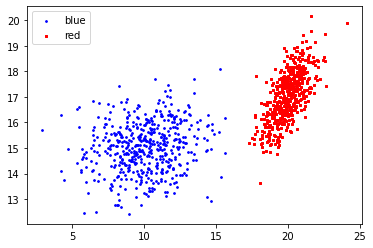

In [4]:
mean_1=[10,15]
std_1=[[5,0.5],[0.5,1]]
mean_2=[20,17]
std_2=[[1,0.7],[0.7,1]]
gauss_1=np.random.multivariate_normal(mean_1,std_1,500)
gauss_2=np.random.multivariate_normal(mean_2,std_2,500)

df = pd.DataFrame(gauss_1, columns=["x", "y"])
df_2= pd.DataFrame(gauss_2, columns=["x", "y"])

plt.scatter(df['x'],df['y'], c='b', marker='o', label='blue', s=3)
plt.scatter(df_2['x'], df_2['y'], c='r', marker='s', label='red', s=3)
plt.legend(loc='upper left')
plt.show()

how many dataset?
5


<ipython-input-5-3e0a37c1979b>:20: RuntimeWarning: covariance is not positive-semidefinite.
  gauss=np.random.multivariate_normal(mean,std,500)


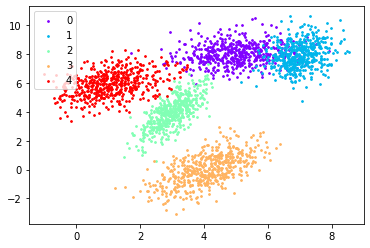

In [5]:
import matplotlib.cm as cm

def is_neg_def(x):
    return np.all(np.linalg.eigvals(x) < 0)

print('how many dataset?')
x=int(input())

colors = iter(cm.rainbow(np.linspace(0, 1, x)))

for i in range(0,x):
    mean=np.random.randint(10, size=2)
    std=np.random.random_sample((2, 2))
    
    while True:
        std=np.random.random_sample((2, 2))
        if (is_neg_def(std)==False):
            break
    
    gauss=np.random.multivariate_normal(mean,std,500)
    df = pd.DataFrame(gauss, columns=["x", "y"])
    
    plt.scatter(df['x'],df['y'], color=next(colors), marker='o', label=i, s=3)
        
plt.legend(loc='upper left')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

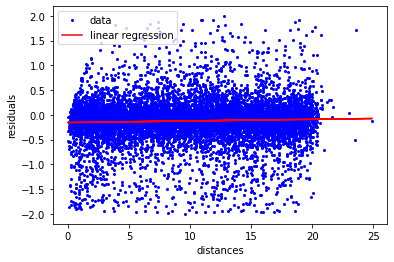

In [6]:
data=np.load('residuals_261.npy',allow_pickle=True)

df=pd.DataFrame(data.item())
df=df[abs(df['residuals']) < 2]

slope, intercept, _, _ , _= scipy.stats.linregress(df['distances'], df['residuals'])

plt.plot(df['distances'], df['residuals'], 'o', c='b', label='data', markersize=2)
plt.plot(df['distances'], intercept+slope*df['distances'], 'r', label='linear regression')

plt.legend(loc='upper left')
plt.ylabel('residuals')
plt.xlabel('distances')
plt.show()

<ErrorbarContainer object of 3 artists>

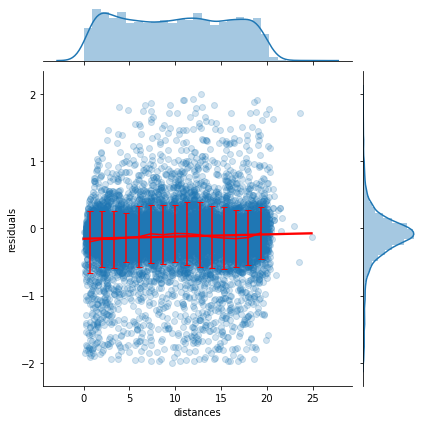

In [7]:
g = sns.jointplot("distances", "residuals", data=df, kind="reg", line_kws={"color": "red"}, scatter_kws={'alpha':0.2})

bins=15
x_min=0
x_max=20
num=(x_max-x_min)/bins

x=np.zeros(bins)
x[0]=num/2
for i in range(1,bins):
    x[i]=x[i-1]+num
    
intervals=np.zeros(bins+1)
for i in range(1,bins+1):
    intervals[i]=intervals[i-1]+num

y=np.zeros(bins)
erry=np.zeros(bins)
for i in range(0,bins):
    df_i=df[(df['distances']< intervals[i+1]) & (df['distances'] > intervals[i])]
    a=df_i.mean(axis=0)
    y[i]=a[0]
    
    b=df_i.std(axis=0)
    erry[i]=b[0]

plt.errorbar(x, y, yerr = erry, color='red',capsize=3)